# NHANES (National Health and Nutrition Examination Survey) Introductory Analysis

In this notebook, we will use the PIC-SURE API to pull participant-level data from NHANES into our Sagemaker notebook. We will perform an initial exploration and visualization of the data.

1. Package installation and environment set-up
2. Connecting to a PIC-SURE resource
3. Accessing and exploring the NHANES data dictionary
4. Building a query and retrieving data from NHANES
5. Explore and visualize the demographics and laboratory values of the NHANES dataset

To explore the NHANES dataset using the PIC-SURE User Interface, visit: https://pic-sure.aim-ahead-dev.host/

To learn more about the NHANES dataset, visit: https://www.cdc.gov/nchs/nhanes/about_nhanes.htm

## Package installation and environment set-up

In [1]:
install.packages("devtools")
Sys.setenv(TAR = "/bin/tar")
options(unzip = "internal")
devtools::install_github("hms-dbmi/pic-sure-r-adapter-hpds", ref="main", force=T, quiet=FALSE)
library(tidyverse)

also installing the dependencies ‘credentials’, ‘zip’, ‘gitcreds’, ‘httr2’, ‘ini’, ‘diffobj’, ‘gert’, ‘gh’, ‘whisker’, ‘downlit’, ‘xopen’, ‘brew’, ‘brio’, ‘praise’, ‘waldo’, ‘usethis’, ‘desc’, ‘miniUI’, ‘pkgbuild’, ‘pkgdown’, ‘pkgload’, ‘profvis’, ‘rcmdcheck’, ‘remotes’, ‘roxygen2’, ‘rversions’, ‘sessioninfo’, ‘testthat’, ‘urlchecker’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




curl (5.1.0 -> 5.2.1  ) [CRAN]
hash (NA    -> 2.2.6.3) [CRAN]


Installing 2 packages: curl, hash

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpXXk2vS/remotes350c1a40c50b/hms-dbmi-pic-sure-r-adapter-hpds-edd4981/DESCRIPTION’ ... OK
* preparing ‘picsure’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘picsure_0.1.1.tar.gz’



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Connecting to a PIC-SURE resource

The following is required to get access to the PIC-SURE API:
* a network URL
* a user-specific security token saved as `token.txt`.

If you have not already retrieved your user-specific token, please visit the following documentation: https://pic-sure.gitbook.io/aim-ahead-pic-sure/data-analysis-using-the-pic-sure-api/pic-sure-user-access-token

In [2]:
PICSURE_network_URL = "https://pic-sure.aim-ahead.host/picsure"
token_file <- "token.txt"
token <- scan(token_file, what = "character")
session <- picsure::bdc.initializeSession(PICSURE_network_URL, token)
session <- picsure::bdc.setResource(session = session,  resourceName = "AUTH")

Loading resources...

Loading user profile...

Loading PIC-SURE dictionary (this may take several minutes)...

Loading genomic annotations...

Initialization complete.



You can get help with PIC-SURE library functions by using the `?` operator

In [3]:
?picsure::bdc.searchPicsure

For example, the above output lists and briefly defines how to use the `searchPicsure` function.

## Accessing and exploring the NHANES data dictionary
Now that you have set up your connection to the PIC-SURE API, let's view what variables are present in the NHANES dataset. The `dictionary` method can be used to retrieve information about all the variables or to search the data dictionary for a specific term.

In [4]:
# List the first 10 variables you have access to
datadict_df <- picsure::bdc.searchPicsure(session)
head(datadict_df, 10)

,name,var_id,var_name,var_description,data_type,group_id,group_name,group_description,study_id,study_description,is_stigmatized,min,max,categorical,values
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>
1,\nhanes\questionnaire_food_component_recall\Total_home_tap_water_drank_yesterday(gm)\,Total_home_tap_water_drank_yesterday(gm),Total_home_tap_water_drank_yesterday(gm),,continuous,,,,nhanes,,false,0.00,52864.00,FALSE,
2,\nhanes\questionnaire_street_drug\#days_used_needle_for_street_drugs/year\,#days_used_needle_for_street_drugs/year,#days_used_needle_for_street_drugs/year,,continuous,,,,nhanes,,false,0.00,60.00,FALSE,
3,\nhanes\laboratory_blood\Red_blood_cell_count_(million_cells/uL)\,Red_blood_cell_count_(million_cells/uL),Red_blood_cell_count_(million_cells/uL),,continuous,,,,nhanes,,false,1.71,9.16,FALSE,
4,\nhanes\questionnaire_street_drug\#days_used_street_drugs_over_past_year\,#days_used_street_drugs_over_past_year,#days_used_street_drugs_over_past_year,,continuous,,,,nhanes,,false,0.00,65.00,FALSE,
5,\nhanes\questionnaire_food_component_recall\#_of_times_other_fish_eaten_past_30_days\,#_of_times_other_fish_eaten_past_30_days,#_of_times_other_fish_eaten_past_30_days,,continuous,,,,nhanes,,false,1.00,30.00,FALSE,
6,\nhanes\questionnaire_viral_infection\Doctor_ever_told_you_had_genital_warts\,Doctor_ever_told_you_had_genital_warts,Doctor_ever_told_you_had_genital_warts,,continuous,,,,nhanes,,false,0.00,1.00,FALSE,
7,\nhanes\questionnaire_food_component_recall\Breaded_fish_products_eaten_past_30_days\,Breaded_fish_products_eaten_past_30_days,Breaded_fish_products_eaten_past_30_days,,continuous,,,,nhanes,,false,0.00,1.00,FALSE,
8,\nhanes\questionnaire_street_drug\Ever_used_cocaine_or_other_street_drug\,Ever_used_cocaine_or_other_street_drug,Ever_used_cocaine_or_other_street_drug,,continuous,,,,nhanes,,false,0.00,1.00,FALSE,
9,\nhanes\questionnaire_street_drug\Ever_use_a_needle_to_inject_illegal_drug\,Ever_use_a_needle_to_inject_illegal_drug,Ever_use_a_needle_to_inject_illegal_drug,,continuous,,,,nhanes,,false,0.00,1.00,FALSE,


In [9]:
# Search the data dictionary for age
picsure::bdc.searchPicsure(session, keyword = 'age', includeValues = TRUE) 

name,var_id,var_name,var_description,data_type,group_id,group_name,group_description,study_id,study_description,is_stigmatized,min,max,categorical,values
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>
\nhanes\questionnaire_pharmaceutical\Age_started_estrogen/progestin_patches\,Age_started_estrogen/progestin_patches,Age_started_estrogen/progestin_patches,,continuous,,,,nhanes,,false,21,67,FALSE,
\nhanes\questionnaire_smoking_behavior\Age_started_pipe_smoking_regularly\,Age_started_pipe_smoking_regularly,Age_started_pipe_smoking_regularly,,continuous,,,,nhanes,,false,6,79,FALSE,
\nhanes\questionnaire_pharmaceutical\Age_started_estrogen/progestin_pills\,Age_started_estrogen/progestin_pills,Age_started_estrogen/progestin_pills,,continuous,,,,nhanes,,false,17,85,FALSE,
\nhanes\questionnaire_smoking_behavior\Age_started_using_snuff_regularly\,Age_started_using_snuff_regularly,Age_started_using_snuff_regularly,,continuous,,,,nhanes,,false,7,76,FALSE,
\nhanes\questionnaire_street_drug\Age_when_first_tried_marijuana\,Age_when_first_tried_marijuana,Age_when_first_tried_marijuana,,continuous,,,,nhanes,,false,1,45,FALSE,
\nhanes\questionnaire_street_drug\Age_first_used_cocaine\,Age_first_used_cocaine,Age_first_used_cocaine,,continuous,,,,nhanes,,false,2,59,FALSE,
\nhanes\questionnaire_smoking_behavior\Age_started_cigar_smoking_regularly\,Age_started_cigar_smoking_regularly,Age_started_cigar_smoking_regularly,,continuous,,,,nhanes,,false,6,84,FALSE,
\nhanes\questionnaire_smoking_behavior\Age_last_smoked_cigarettes_regularly\,Age_last_smoked_cigarettes_regularly,Age_last_smoked_cigarettes_regularly,,continuous,,,,nhanes,,false,1,85,FALSE,
\nhanes\questionnaire_pharmaceutical\Age_started_progestin-only_pills\,Age_started_progestin-only_pills,Age_started_progestin-only_pills,,continuous,,,,nhanes,,false,13,78,FALSE,


The above dataframe has many pieces of information for the variables that are available. Let's select only the columns that are informative for us.
- study_id: Study ID, in AIM AHEAD we have the NHANES dataset available.
- var_id: Variable ID
- var_name: Variable Name (can be more descriptive than the ID)
- name: The full path of the variable, needed for querying PIC-SURE.

In [10]:
# Isolate columns of interest
datadict_df <- datadict_df %>%
  select(study_id, var_id, var_name, name)

head(datadict_df, 5)

,study_id,var_id,var_name,name
,<chr>,<chr>,<chr>,<chr>
1,nhanes,Total_home_tap_water_drank_yesterday(gm),Total_home_tap_water_drank_yesterday(gm),\nhanes\questionnaire_food_component_recall\Total_home_tap_water_drank_yesterday(gm)\
2,nhanes,#days_used_needle_for_street_drugs/year,#days_used_needle_for_street_drugs/year,\nhanes\questionnaire_street_drug\#days_used_needle_for_street_drugs/year\
3,nhanes,Red_blood_cell_count_(million_cells/uL),Red_blood_cell_count_(million_cells/uL),\nhanes\laboratory_blood\Red_blood_cell_count_(million_cells/uL)\
4,nhanes,#days_used_street_drugs_over_past_year,#days_used_street_drugs_over_past_year,\nhanes\questionnaire_street_drug\#days_used_street_drugs_over_past_year\
5,nhanes,#_of_times_other_fish_eaten_past_30_days,#_of_times_other_fish_eaten_past_30_days,\nhanes\questionnaire_food_component_recall\#_of_times_other_fish_eaten_past_30_days\


In this notebook, we will do an initial exploration into the demographic and laboratory characteristics of our NHANES dataset. By exploring the data dictionary, we will create a subset dataframe containing the variables we are interested in exploring. 

In [12]:
# Identify variable IDs of interest using the data dictionary
variables_of_interest <- c('AGE', 'SEX', 'RACE', 
                         'Cholesterol_(mg/dL)', 'HDL-cholesterol_(mg/dL)', 'LDL-cholesterol_(mg/dL)')

# Subset the data dictionary to include only the variables of interest
datadict_subset = datadict_df %>%
  filter(var_id %in% variables_of_interest)
datadict_subset

study_id,var_id,var_name,name
<chr>,<chr>,<chr>,<chr>
nhanes,RACE,RACE,\nhanes\demographics\RACE\
nhanes,HDL-cholesterol_(mg/dL),HDL-cholesterol_(mg/dL),\nhanes\laboratory_biochemistry\HDL-cholesterol_(mg/dL)\
nhanes,LDL-cholesterol_(mg/dL),LDL-cholesterol_(mg/dL),\nhanes\laboratory_biochemistry\LDL-cholesterol_(mg/dL)\
nhanes,Cholesterol_(mg/dL),Cholesterol_(mg/dL),\nhanes\laboratory_biochemistry\Cholesterol_(mg/dL)\
nhanes,SEX,SEX,\nhanes\demographics\SEX\
nhanes,AGE,AGE,\nhanes\demographics\AGE\


## Building a query and retrieving data from NHANES
Now that we have a list of variables of interest, we will retrieve the participant-level data associated with those variables. 

The first step is setting up the query object, which is called `myquery` below.

In [13]:
myquery <- picsure::bdc.newQuery(session)

There are several methods that can be used to build a query, which can be specified by the `type` argument in the `picsure::addClause` function.

| type | functionality |
|--------|-------------------|
| type = 'SELECT' | return all variables included in the list (no record subsetting)|
| type = 'REQUIRE' | return all variables included in the list; only records that do not contain null values for input variables |
| type = 'ANYOF' | return all variables included in the list; only records that contain at least one non-null value for input variables |
| type = 'FILTER' | return input variable; only records that match filter criteria |

In this example, we are not interested in performing any record subsetting. We want to retrieve all participant-level data associated with our variables of interest, so we will use the `type = 'SELECT'` argument. Note that these methods take the variable `name` as input, so we specify that column in our data dictionary subset.

In [14]:
myquery <- picsure::addClause(query = myquery, # Query to build on
                              keys = datadict_subset$name, # Full variable paths to filter on
                              type = "SELECT") # The type of query, in this case SELECT


Now we can export our data to a dataframe in this notebook.

In [15]:
results_df <- picsure::runQuery(myquery, resultType = 'DATA_FRAME')
head(results_df)

,Patient ID,\_consents\,\nhanes\demographics\AGE\,\nhanes\demographics\RACE\,\nhanes\demographics\SEX\,\nhanes\laboratory_biochemistry\Cholesterol_(mg/dL)\,\nhanes\laboratory_biochemistry\HDL-cholesterol_(mg/dL)\,\nhanes\laboratory_biochemistry\LDL-cholesterol_(mg/dL)\
,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,nhanes,2,black,female,NaN,NaN,NaN
2,2,nhanes,77,white,male,203,54,136
3,3,nhanes,10,white,female,NaN,30,58
4,4,nhanes,1,black,male,NaN,NaN,NaN
5,5,nhanes,49,white,male,277,42,168
6,6,nhanes,19,other,female,148,61,NaN


The results dataframe contains participants as rows and the variables which were added to our query as columns. 

## Explore and visualize the demographics and laboratory values of the NHANES dataset

In [16]:
# rename our columns to make them easier to work with in R
colnames(results_df) <- gsub(x = colnames(results_df), pattern = '\\\\', replacement = '')

### Plot a distribution of participant ages

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


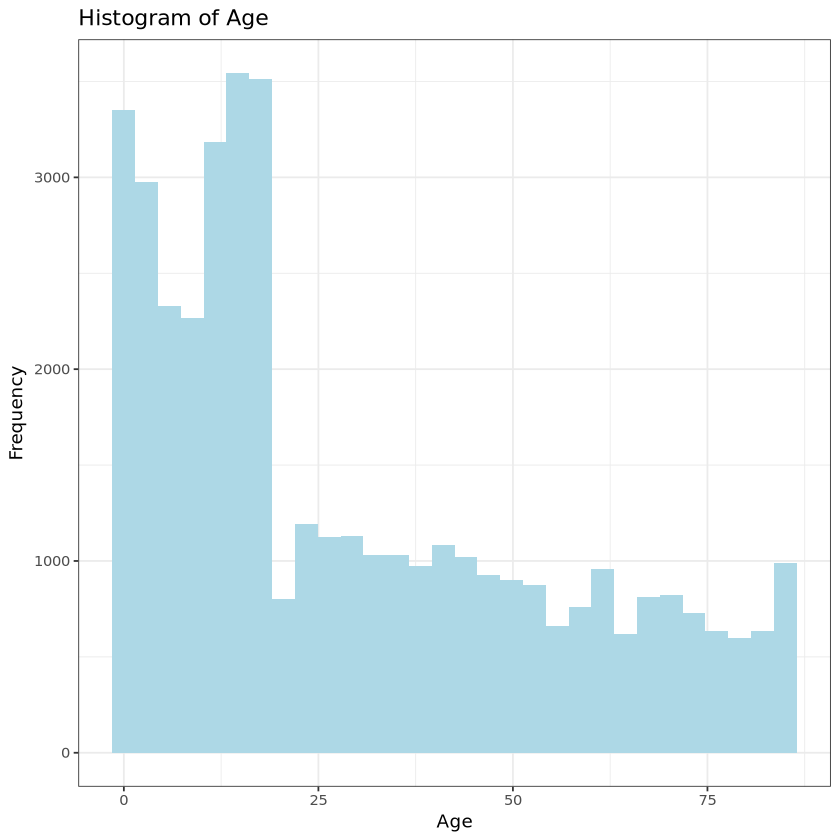

In [17]:
results_df %>%
  ggplot(aes(x = nhanesdemographicsAGE)) +
    geom_histogram(fill = 'lightblue') +
    theme_bw() +
    xlab('Age') +
    ylab('Frequency') +
    ggtitle('Histogram of Age')

### Plot a pie chart of the sex distribution

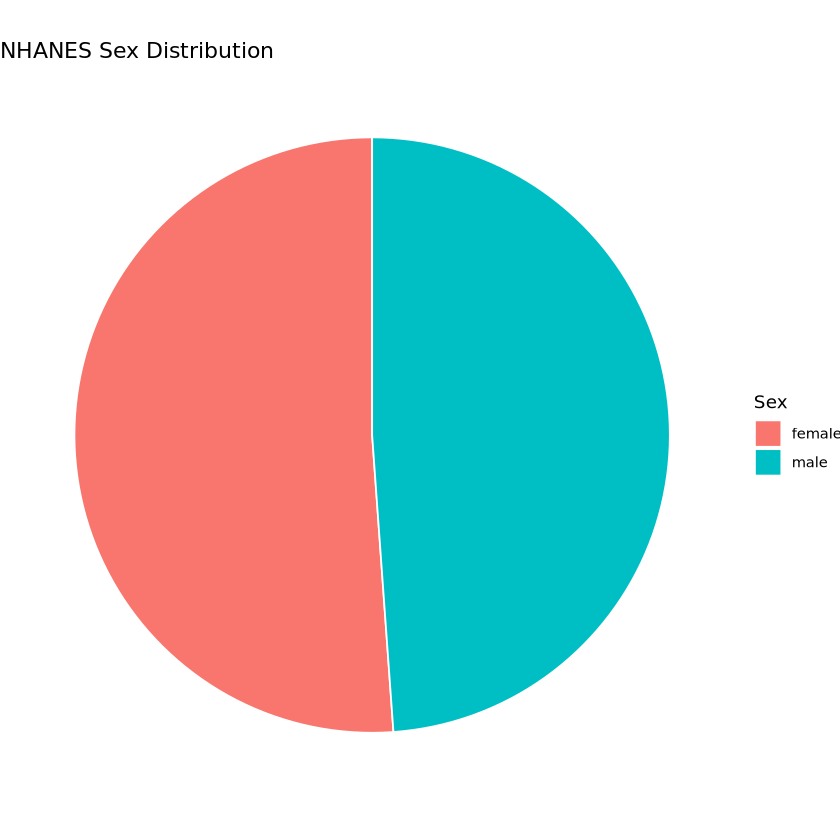

In [18]:
results_df %>%
  group_by(nhanesdemographicsSEX) %>%
  summarise(n = n()) %>%
  ggplot(aes(x = '', y = n, fill = nhanesdemographicsSEX)) +
    geom_bar(stat = 'identity', width = 1, color = 'white') + 
    coord_polar('y', start = 0) +
    theme_void() +
    labs(fill = "Sex") +
    ggtitle('NHANES Sex Distribution')

### Plot a bar chart to visualize the race distribution

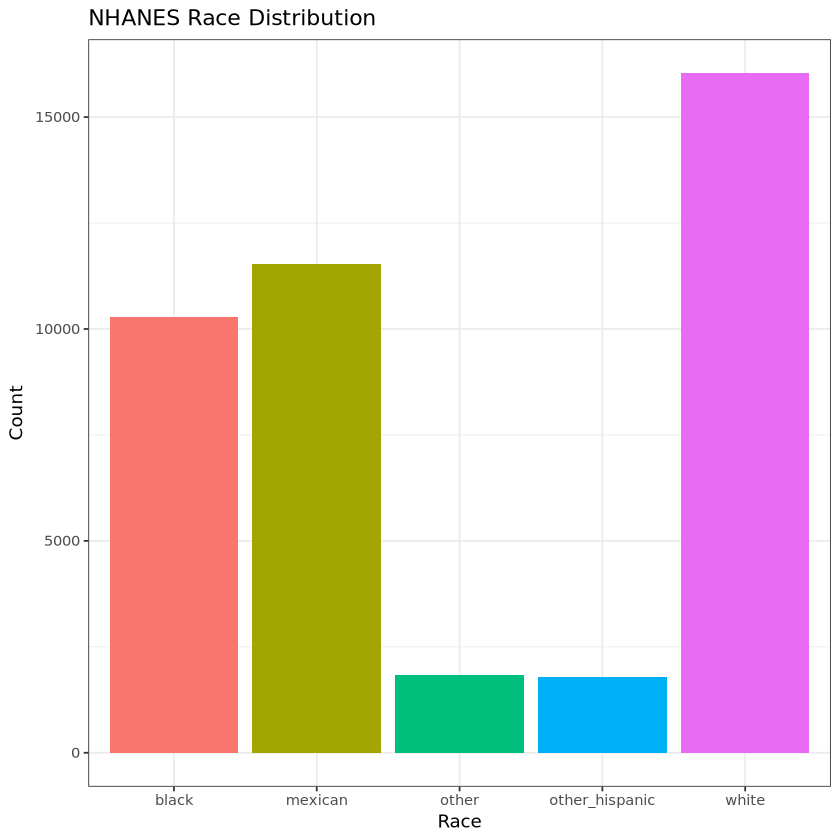

In [19]:
results_df %>%
  ggplot(aes(x = nhanesdemographicsRACE, fill = nhanesdemographicsRACE)) +
    geom_bar(show.legend = FALSE) + 
    theme_bw() +
    xlab('Race') +
    ylab('Count') +
    ggtitle('NHANES Race Distribution')

### Plot the distribution of cholesterol labs to compare average Total, HDL, and LDL values

In [20]:
results_df %>%head()

,Patient ID,_consents,nhanesdemographicsAGE,nhanesdemographicsRACE,nhanesdemographicsSEX,nhaneslaboratory_biochemistryCholesterol_(mg/dL),nhaneslaboratory_biochemistryHDL-cholesterol_(mg/dL),nhaneslaboratory_biochemistryLDL-cholesterol_(mg/dL)
,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,nhanes,2,black,female,NaN,NaN,NaN
2,2,nhanes,77,white,male,203,54,136
3,3,nhanes,10,white,female,NaN,30,58
4,4,nhanes,1,black,male,NaN,NaN,NaN
5,5,nhanes,49,white,male,277,42,168
6,6,nhanes,19,other,female,148,61,NaN


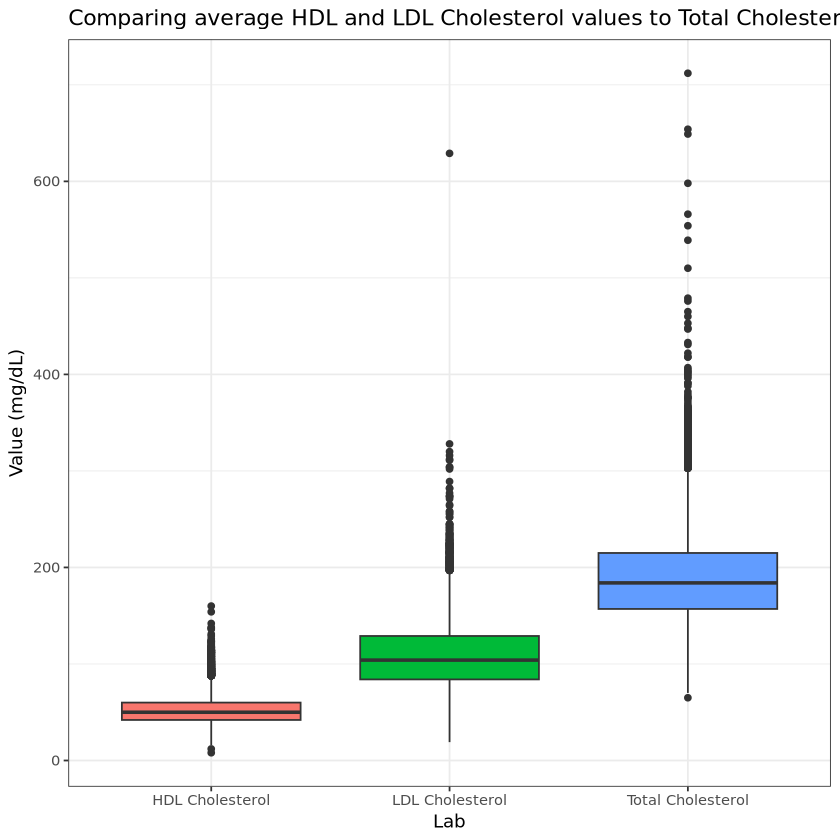

In [24]:
results_df %>%
  pivot_longer(cols = c('nhaneslaboratory_biochemistryCholesterol_(mg/dL)', 
                        'nhaneslaboratory_biochemistryHDL-cholesterol_(mg/dL)',
                        'nhaneslaboratory_biochemistryLDL-cholesterol_(mg/dL)'),
               names_to = 'Lab', 
               values_to = 'Value (mg/dL)') %>%
  filter(!is.na(`Value (mg/dL)`)) %>%
  mutate(Lab = ifelse(Lab == 'nhaneslaboratory_biochemistryCholesterol_(mg/dL)', 'Total Cholesterol',
                     ifelse(Lab == 'nhaneslaboratory_biochemistryLDL-cholesterol_(mg/dL)', 'LDL Cholesterol',
                           ifelse(Lab == 'nhaneslaboratory_biochemistryHDL-cholesterol_(mg/dL)', 'HDL Cholesterol', 'Undefined')))) %>%
  ggplot(aes(x = Lab, y = `Value (mg/dL)`, fill = Lab)) +
    geom_boxplot(show.legend = FALSE) + 
    theme_bw() +
    ggtitle('Comparing average HDL and LDL Cholesterol values to Total Cholesterol')